In [1]:
# 全局设置
import datetime as dt

import numpy as np
import pandas as pd

import QuantStudio.api as QS
from QuantStudio.FactorDataBase.TinySoftDB import TinySoftDB

TSDB = TinySoftDB(sys_args={"安装目录": "C:\\Program Files\\Tinysoft\\Analyse.NET",
                           "IP地址": "tsl.tinysoft.com.cn",
                           "端口": 443})
TSDB.connect();

In [2]:
StartDT = dt.datetime(2010, 1, 1)
EndDT = dt.datetime(2020, 9, 11)
TargetID = "000300.SH"

DTs = TSDB.getTradeDay(start_date=StartDT, end_date=EndDT)
AIPDTs = QS.Tools.DateTime.getMonthLastDateTime(DTs)[:-1]

FT = TSDB.getTable("分时和日线数据", args={"周期": "day"})
Price = FT.readData(factor_names=["最新价"], ids=[TargetID], dts=DTs).iloc[0]

D:\Project\QuantStudio\QuantStudio\FactorDataBase\FactorDB.py:478: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  return self.__QS_calcData__(raw_data=self.__QS_prepareRawData__(factor_names=factor_names, ids=ids, dts=dts, args=args), factor_names=factor_names, ids=ids, dts=dts, args=args)
D:\Project\QuantStudio\QuantStudio\FactorDataBase\TinySoftDB.py:178: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides 

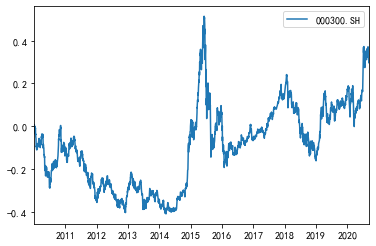

In [4]:
(Price/Price.iloc[0,0]-1).plot()

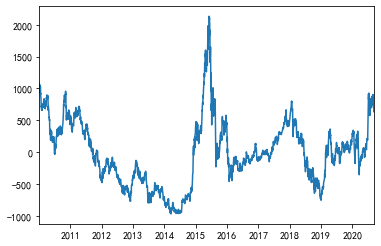

In [5]:
from scipy import signal
Noise = pd.Series(signal.detrend(Price.iloc[:, 0].values), index=Price.index)
Noise.plot();